# XRD Analysis for STO Crystal Deposition



Current directory: G:\Study\Master Thesis\Characterization\XRD\17-11-2025 Crystal Plates\XY Data


C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


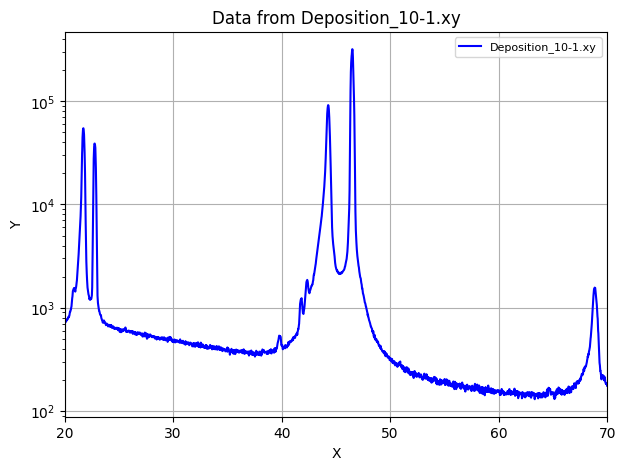

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


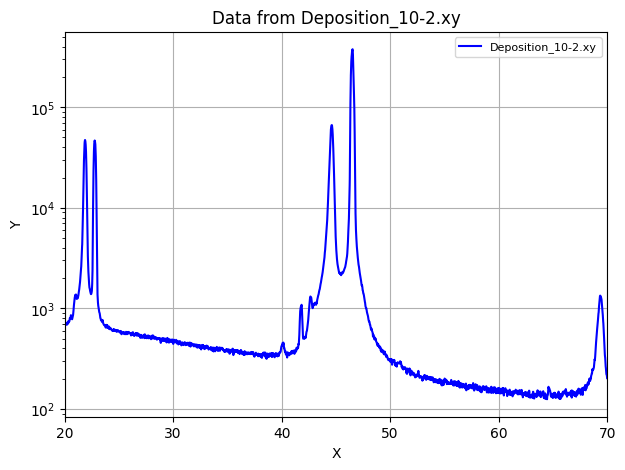

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


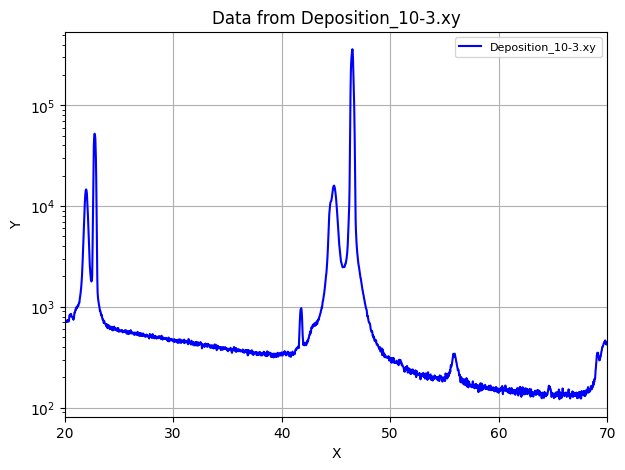

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


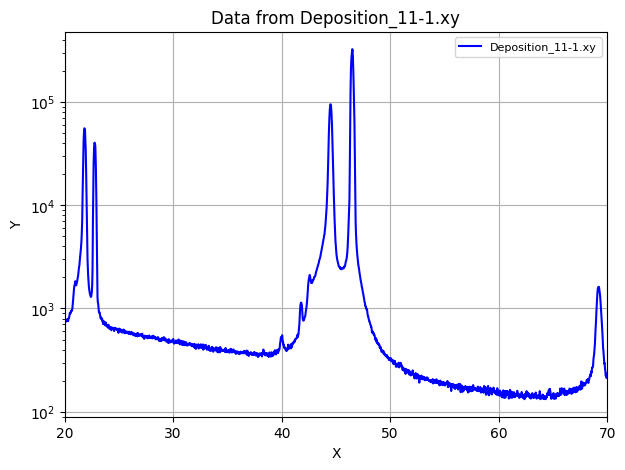

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


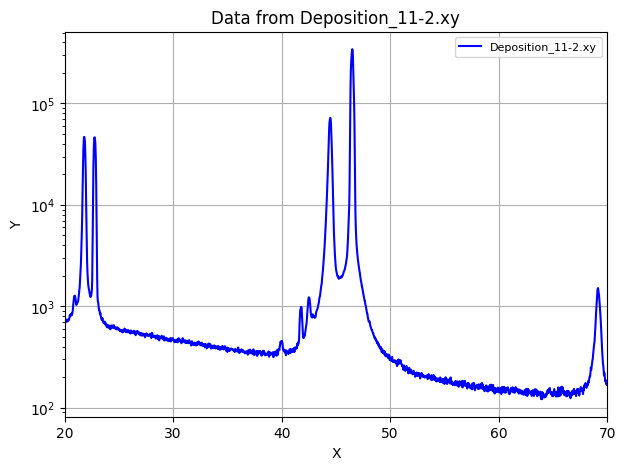

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


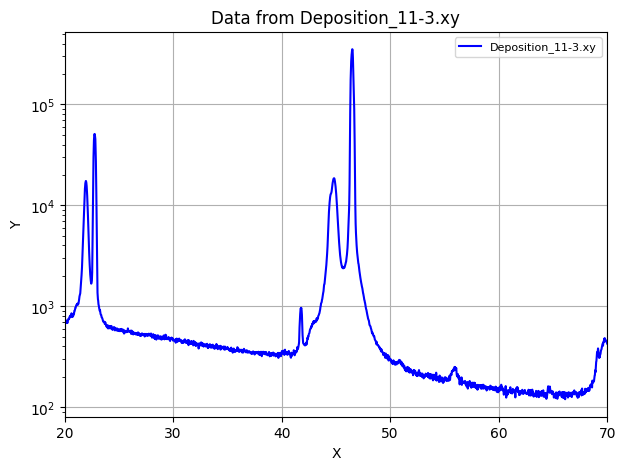

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


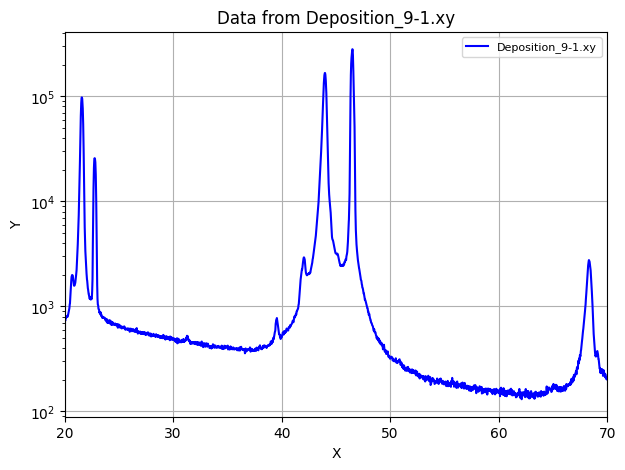

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


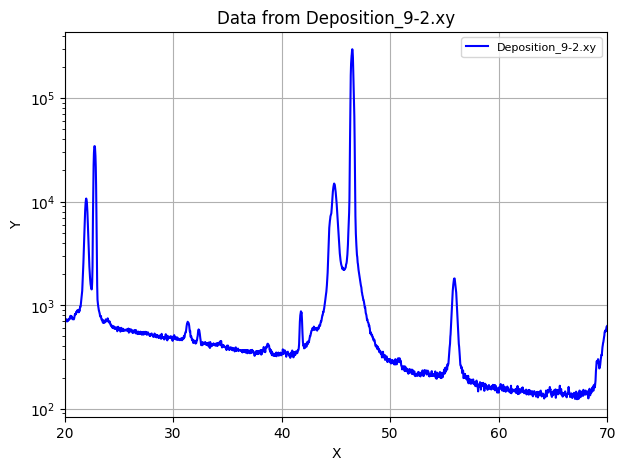

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


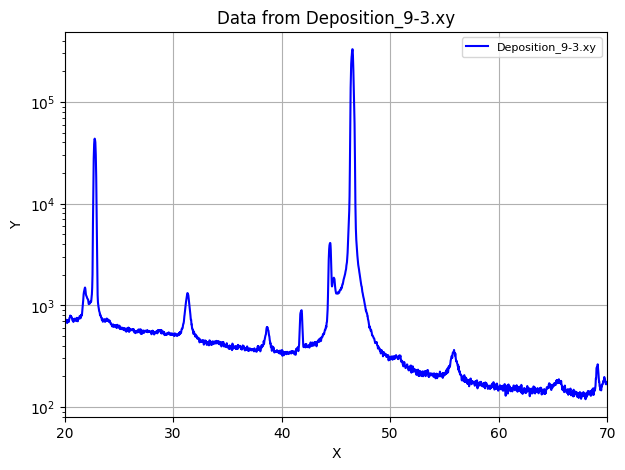

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


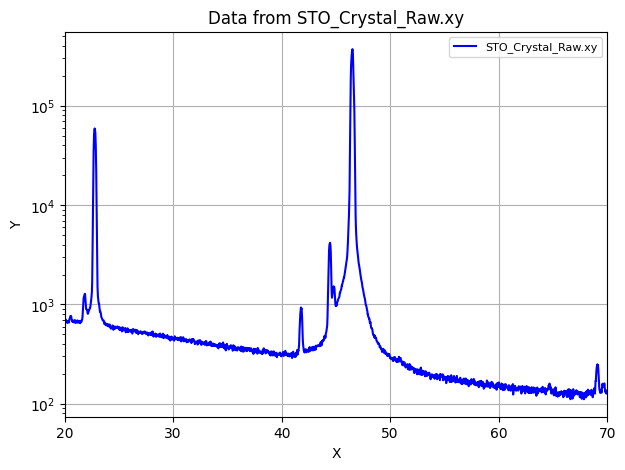

C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\3157676472.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])


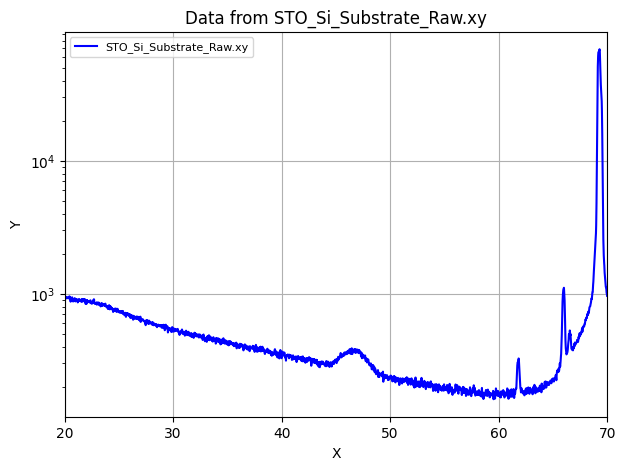

In [24]:
import pandas as pd
import numpy as np
import os, glob, re, csv
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths, savgol_filter
from scipy.optimize import curve_fit
from matplotlib.tri import Triangulation
from matplotlib.colors import LinearSegmentedColormap, PowerNorm, Normalize  # or Normalize
from pathlib import Path



# Show current working directory
print("Current directory:", os.getcwd())

# Change working directory
os.chdir("G:\Study\Master Thesis\Characterization\XRD\\17-11-2025 Crystal Plates")

folder = "G:\Study\Master Thesis\Characterization\XRD\\17-11-2025 Crystal Plates\XY Data"
os.chdir(folder)

files = glob.glob("*.xy")

# Loop over each file and make a separate graph
for f in files:
    df = pd.read_csv(f, delim_whitespace=True, header=None, names=["X", "Y"])
    
    plt.figure(figsize=(7,5))
    plt.plot(df["X"], df["Y"], label=f, color="blue")
    plt.title(f"Data from {f}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(fontsize=8)
    plt.xlim(20,70)
    # plt.ylim(0,100000)
    plt.yscale('log')
    plt.grid()
    plt.show()

In [14]:
# Reference XRD peak positions for BaTiO3, SrTiO3, and Si
# Data from ICDD/JCPDS databases (approximate values for Cu Kα radiation, λ = 1.5406 Å)

XRD_REFERENCES = {
    'BaTiO3': {
        # Tetragonal BaTiO3 at room temperature
        '(100)': 22.1,
        '(110)': 31.5,
        '(111)': 38.7,
        '(200)': 45.1,
        '(102)': 50.7,
        '(112)': 55.9,
        '(202)': 66.7,
    },
    'SrTiO3': {
        # Cubic SrTiO3
        '(100)': 22.76,
        '(110)': 32.39,
        '(111)': 39.96,
        '(200)': 46.46,
        '(210)': 52.32,
        '(211)': 57.78,
        '(220)': 67.78,
        '(300)': 72.46,
        '(310)': 77.21,
    },
    'Si': {
        # Cubic Silicon
        '(111)': 28.44,
        '(220)': 47.30,
        '(311)': 56.12,
        '(400)': 69.13,
        '(331)': 76.38,
        '(422)': 88.03,
    }
}

# Tolerance for peak matching (in degrees 2θ)
PEAK_MATCH_TOLERANCE = 1  # ±X degrees

def match_peak_to_reference(peak_position, tolerance=PEAK_MATCH_TOLERANCE):
    """
    Match a detected peak position to known reference peaks.
    Returns list of possible matches with (material, plane, reference_angle, deviation).
    """
    matches = []
    
    for material, planes in XRD_REFERENCES.items():
        for plane, ref_angle in planes.items():
            deviation = abs(peak_position - ref_angle)
            if deviation <= tolerance:
                matches.append({
                    'material': material,
                    'plane': plane,
                    'reference': ref_angle,
                    'deviation': deviation
                })
    
    # Sort by smallest deviation
    matches.sort(key=lambda x: x['deviation'])
    return matches

print("XRD reference database loaded successfully!")
print("\nReference peaks loaded:")
for material, planes in XRD_REFERENCES.items():
    print(f"  {material}: {len(planes)} planes")

XRD reference database loaded successfully!

Reference peaks loaded:
  BaTiO3: 7 planes
  SrTiO3: 9 planes
  Si: 6 planes


In [25]:
def analyze_xrd_with_peak_identification(filepath, prominence_ratio=50, height_percentile=5):
    """
    Comprehensive XRD analysis with automatic peak detection and material identification.
    
    Parameters:
    -----------
    filepath : str
        Path to XY data file
    prominence_ratio : float
        Minimum prominence as ratio to median intensity (higher = stricter)
    height_percentile : float
        Minimum height as percentile of intensity distribution
        
    Returns:
    --------
    dict with detected peaks and their properties
    """
    # Load data
    data = np.loadtxt(filepath)
    two_theta = data[:, 0]
    intensity = data[:, 1]
    
    # Smooth data for better peak detection
    from scipy.signal import savgol_filter
    window = min(21, len(intensity) // 10)
    if window % 2 == 0:
        window += 1
    window = max(5, window)
    
    intensity_smooth = savgol_filter(intensity, window, 3, mode='interp')
    
    # Peak detection parameters
    min_height = 0.1*np.percentile(intensity, height_percentile)
    min_prominence =  0.1*np.median(intensity)*prominence_ratio
    
    # Find peaks
    peaks_idx, properties = find_peaks(
        intensity_smooth, 
        prominence=min_prominence,
        height=min_height,
        distance=5  # Minimum separation between peaks
    )
    
    # Calculate FWHM and integrated area for each peak
    peak_data = []
    
    for idx in peaks_idx:
        peak_position = two_theta[idx]
        peak_intensity = intensity[idx]
        
        # Initialize values
        fwhm = np.nan
        integrated_area = np.nan
        
        # Calculate FWHM with improved method
        try:
            # Try to calculate FWHM using peak_widths
            widths, width_heights, left_ips, right_ips = peak_widths(
                intensity, [idx], rel_height=0.5
            )
            
            # Check if the width is valid
            if widths[0] > 0 and np.isfinite(widths[0]):
                # Convert from indices to 2theta values
                left_2theta = np.interp(left_ips[0], range(len(two_theta)), two_theta)
                right_2theta = np.interp(right_ips[0], range(len(two_theta)), two_theta)
                fwhm = abs(right_2theta - left_2theta)
                
                # Double-check FWHM is reasonable
                if fwhm < 1e-6:  # Too small, try alternative method
                    raise ValueError("FWHM too small")
            else:
                raise ValueError("Invalid width calculated")
                
        except:
            # Alternative FWHM calculation: manual search for half-maximum points
            try:
                half_max = intensity[idx] / 2.0
                
                # Search left side
                left_idx = idx
                while left_idx > 0 and intensity[left_idx] > half_max:
                    left_idx -= 1
                
                # Search right side  
                right_idx = idx
                while right_idx < len(intensity) - 1 and intensity[right_idx] > half_max:
                    right_idx += 1
                
                # Interpolate for more accurate FWHM
                if left_idx < idx and right_idx > idx:
                    # Linear interpolation on left side
                    if intensity[left_idx] != intensity[left_idx + 1]:
                        left_frac = (half_max - intensity[left_idx]) / (intensity[left_idx + 1] - intensity[left_idx])
                        left_2theta = two_theta[left_idx] + left_frac * (two_theta[left_idx + 1] - two_theta[left_idx])
                    else:
                        left_2theta = two_theta[left_idx]
                    
                    # Linear interpolation on right side
                    if intensity[right_idx - 1] != intensity[right_idx]:
                        right_frac = (half_max - intensity[right_idx]) / (intensity[right_idx - 1] - intensity[right_idx])
                        right_2theta = two_theta[right_idx] + right_frac * (two_theta[right_idx - 1] - two_theta[right_idx])
                    else:
                        right_2theta = two_theta[right_idx]
                    
                    fwhm = abs(right_2theta - left_2theta)
                    
                    # If still too small, use a minimum estimate based on data point spacing
                    if fwhm < 1e-6:
                        step_size = np.mean(np.diff(two_theta))
                        fwhm = 2 * step_size  # Minimum 2 data points wide
                        
            except:
                # Last resort: estimate from data point spacing
                step_size = np.mean(np.diff(two_theta))
                fwhm = 3 * step_size
        
        # Calculate integrated area using baseline correction
        try:
            # Find peak region - use wider window for integration
            search_window = max(20, int(0.5 / np.mean(np.diff(two_theta))))  # At least ±0.5 degrees
            
            left_idx = max(0, idx - search_window)
            right_idx = min(len(intensity) - 1, idx + search_window)
            
            # Find local minima on each side as baseline points
            left_region = intensity[left_idx:idx]
            right_region = intensity[idx:right_idx]
            
            if len(left_region) > 0 and len(right_region) > 0:
                left_baseline_idx = left_idx + np.argmin(left_region)
                right_baseline_idx = idx + np.argmin(right_region)
                
                # Create baseline
                baseline_left_val = intensity[left_baseline_idx]
                baseline_right_val = intensity[right_baseline_idx]
                
                # Extract region for integration
                int_left = left_baseline_idx
                int_right = right_baseline_idx + 1
                
                # Linear baseline
                n_points = int_right - int_left
                baseline = np.linspace(baseline_left_val, baseline_right_val, n_points)
                
                # Subtract baseline and integrate
                peak_region_intensity = intensity[int_left:int_right] - baseline
                peak_region_2theta = two_theta[int_left:int_right]
                
                # Integrate using trapezoidal rule
                integrated_area = np.trapz(np.maximum(peak_region_intensity, 0), peak_region_2theta)
                
                # Sanity check
                if integrated_area < 0 or not np.isfinite(integrated_area):
                    raise ValueError("Invalid area")
            else:
                raise ValueError("Insufficient points for integration")
                
        except:
            # Fallback: estimate area from peak height and FWHM (Gaussian approximation)
            if np.isfinite(fwhm) and fwhm > 0:
                # Area of Gaussian = height * FWHM * sqrt(pi/ln(2)) / 2
                integrated_area = intensity[idx] * fwhm * np.sqrt(np.pi / np.log(2)) / 2
            else:
                integrated_area = np.nan
        
        # Match to reference materials
        matches = match_peak_to_reference(peak_position)
        
        peak_info = {
            'index': idx,
            'position': peak_position,
            'intensity': peak_intensity,
            'fwhm': fwhm,
            'area': integrated_area,
            'matches': matches
        }
        
        peak_data.append(peak_info)
    
    return {
        'two_theta': two_theta,
        'intensity': intensity,
        'intensity_smooth': intensity_smooth,
        'peaks': peak_data,
        'filename': os.path.basename(filepath)
    }

print("Improved peak analysis function defined successfully!")

Improved peak analysis function defined successfully!


In [26]:
def plot_xrd_with_annotations(analysis_result, fig_width=14, fig_height=10):
    """
    Create a comprehensive XRD plot with peak annotations and detailed information table.
    """
    two_theta = analysis_result['two_theta']
    intensity = analysis_result['intensity']
    intensity_smooth = analysis_result['intensity_smooth']
    peaks = analysis_result['peaks']
    filename = analysis_result['filename']
    
    # Create figure with two subplots: main plot and info table
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = fig.add_gridspec(2, 1, height_ratios=[3, 1], hspace=0.3)
    
    # Main XRD plot
    ax_main = fig.add_subplot(gs[0])
    
    # Plot data
    ax_main.plot(two_theta, intensity, 'o-', color='lightblue', 
                 markersize=2, linewidth=0.5, alpha=0.5, label='Raw data')
    ax_main.plot(two_theta, intensity_smooth, '-', color='darkblue', 
                 linewidth=1.5, label='Smoothed data')
    
    # Color map for different materials
    material_colors = {
        'BaTiO3': '#FF6B6B',  # Red
        'SrTiO3': '#4ECDC4',  # Cyan
        'Si': '#FFD93D'       # Yellow
    }
    
    # Plot peaks with annotations
    for peak in peaks:
        pos = peak['position']
        intens = peak['intensity']
        matches = peak['matches']
        
        # Determine color based on best match
        if matches:
            best_match = matches[0]
            color = material_colors.get(best_match['material'], 'gray')
            label_text = f"{best_match['material']}\n{best_match['plane']}"
        else:
            color = 'gray'
            label_text = "Unidentified"
        
        # Mark peak
        ax_main.plot(pos, intens, 'v', color=color, markersize=10, 
                    markeredgecolor='black', markeredgewidth=1, zorder=5)
        
        # Add annotation
        ax_main.annotate(label_text, 
                        xy=(pos, intens), 
                        xytext=(0, 20),
                        textcoords='offset points',
                        ha='center',
                        fontsize=9,
                        fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', 
                                facecolor=color, 
                                edgecolor='black',
                                alpha=0.8),
                        arrowprops=dict(arrowstyle='->', 
                                      connectionstyle='arc3,rad=0',
                                      color='black',
                                      lw=1.5))
    
    ax_main.set_xlabel('2θ (degrees)', fontsize=12, fontweight='bold')
    ax_main.set_ylabel('Intensity (counts)', fontsize=12, fontweight='bold')
    ax_main.set_title(f'XRD Analysis: {filename}', fontsize=14, fontweight='bold', pad=20)
    ax_main.set_yscale('log')
    ax_main.grid(True, alpha=0.3, linestyle='--')
    ax_main.legend(loc='upper right', fontsize=10)
    
    # Information table
    ax_table = fig.add_subplot(gs[1])
    ax_table.axis('off')
    
    # Prepare table data
    table_data = []
    headers = ['Peak #', '2θ (°)', 'Material', 'Plane', 'Intensity', 'FWHM (°)', 'Integrated Area', 'Δ2θ (°)']
    
    for i, peak in enumerate(peaks, 1):
        if peak['matches']:
            best_match = peak['matches'][0]
            material = best_match['material']
            plane = best_match['plane']
            deviation = f"{best_match['deviation']:.3f}"
        else:
            material = "Unknown"
            plane = "-"
            deviation = "-"
        
        row = [
            f"{i}",
            f"{peak['position']:.2f}",
            material,
            plane,
            f"{peak['intensity']:.0f}",
            f"{peak['fwhm']:.3f}" if np.isfinite(peak['fwhm']) else "N/A",
            f"{peak['area']:.1f}" if np.isfinite(peak['area']) else "N/A",
            deviation
        ]
        table_data.append(row)
    
    # Create table
    if table_data:
        table = ax_table.table(cellText=table_data, 
                              colLabels=headers,
                              cellLoc='center',
                              loc='center',
                              bbox=[0, 0, 1, 1])
        
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 2)
        
        # Style header
        for i in range(len(headers)):
            cell = table[(0, i)]
            cell.set_facecolor('#4A90E2')
            cell.set_text_props(weight='bold', color='white')
        
        # Color code material cells
        for i, peak in enumerate(peaks, 1):
            if peak['matches']:
                best_match = peak['matches'][0]
                color = material_colors.get(best_match['material'], 'white')
                table[(i, 2)].set_facecolor(color)
                table[(i, 2)].set_alpha(0.3)
    
    plt.tight_layout()
    return fig

print("Plotting function defined successfully!")

Plotting function defined successfully!


In [27]:
# Change to crystal plates directory
os.chdir("G:\Study\Master Thesis\Characterization\XRD\\17-11-2025 Crystal Plates\XY Data")

# List of crystal plate files to analyze
crystal_files = [
    "STO_Crystal_Raw.xy",
    "STO_Si_Substrate_Raw.xy"
]

# Analyze each file
print("="*80)
print("ANALYZING CRYSTAL PLATE SAMPLES")
print("="*80)

results = {}

for file in crystal_files:
    if os.path.exists(file):
        print(f"\nAnalyzing {file}...")
        
        # Perform analysis
        result = analyze_xrd_with_peak_identification(file, prominence_ratio=10, height_percentile=2)
        results[file] = result
        
        # Print summary
        print(f"  Found {len(result['peaks'])} peaks")
        
        for i, peak in enumerate(result['peaks'], 1):
            matches_str = ""
            if peak['matches']:
                matches_str = ", ".join([f"{m['material']} {m['plane']}" for m in peak['matches'][:2]])
            else:
                matches_str = "No match"
            
            print(f"    Peak {i}: 2θ = {peak['position']:.2f}°, "
                  f"I = {peak['intensity']:.0f}, "
                  f"FWHM = {peak['fwhm']:.3f}°, "
                  f"Area = {peak['area']:.1f} → {matches_str}")
    else:
        print(f"\nWARNING: File {file} not found!")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

ANALYZING CRYSTAL PLATE SAMPLES

Analyzing STO_Crystal_Raw.xy...
  Found 5 peaks
    Peak 1: 2θ = 21.84°, I = 1268, FWHM = 3.882°, Area = 137.8 → BaTiO3 (100), SrTiO3 (100)
    Peak 2: 2θ = 22.77°, I = 59181, FWHM = 0.232°, Area = 13805.2 → SrTiO3 (100), BaTiO3 (100)
    Peak 3: 2θ = 41.80°, I = 912, FWHM = 0.322°, Area = 155.0 → No match
    Peak 4: 2θ = 44.45°, I = 4146, FWHM = 0.262°, Area = 933.1 → BaTiO3 (200)
    Peak 5: 2θ = 46.51°, I = 369037, FWHM = 0.259°, Area = 99828.3 → SrTiO3 (200)

Analyzing STO_Si_Substrate_Raw.xy...
  Found 2 peaks
    Peak 1: 2θ = 65.99°, I = 1090, FWHM = 0.305°, Area = 201.8 → BaTiO3 (202)
    Peak 2: 2θ = 69.27°, I = 67526, FWHM = 0.344°, Area = 23294.8 → No match

ANALYSIS COMPLETE


C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\500989426.py:58: PeakPropertyWarning: some peaks have a prominence of 0
  widths, width_heights, left_ips, right_ips = peak_widths(
C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\500989426.py:58: PeakPropertyWarning: some peaks have a width of 0
  widths, width_heights, left_ips, right_ips = peak_widths(



Generating plot for STO_Crystal_Raw.xy...


C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\1226739661.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


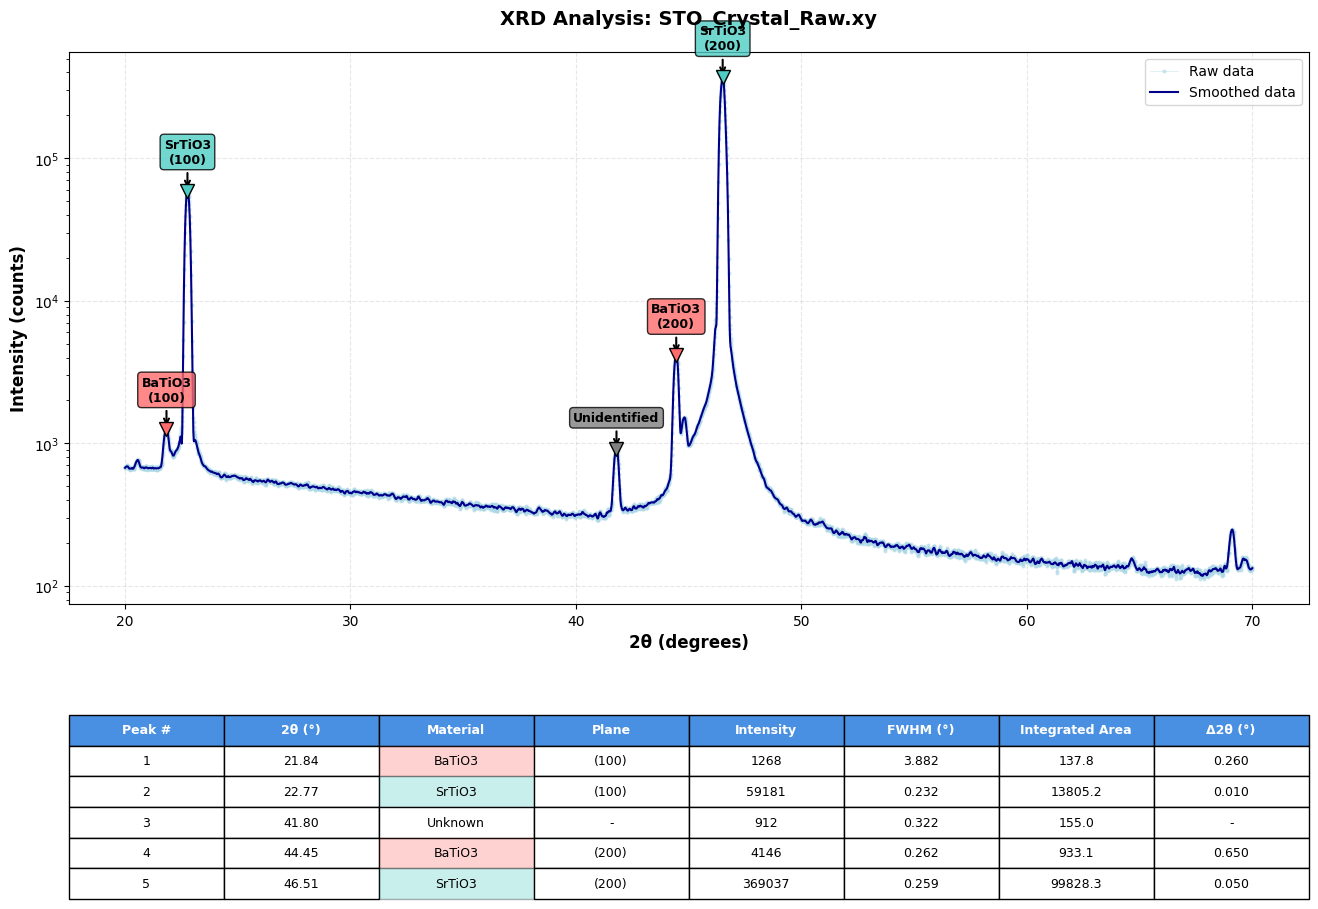


DETAILED PEAK REPORT: STO_Crystal_Raw.xy

Peak #1:
  Position (2θ):     21.840°
  Peak Intensity:    1268.3 counts
  FWHM:              3.8824°
  Integrated Area:   137.76
  Material Identification:
    1. BaTiO3 (100) (Reference: 22.10°, Δ = 0.260°)
    2. SrTiO3 (100) (Reference: 22.76°, Δ = 0.920°)

Peak #2:
  Position (2θ):     22.770°
  Peak Intensity:    59181.2 counts
  FWHM:              0.2321°
  Integrated Area:   13805.22
  Material Identification:
    1. SrTiO3 (100) (Reference: 22.76°, Δ = 0.010°)
    2. BaTiO3 (100) (Reference: 22.10°, Δ = 0.670°)

Peak #3:
  Position (2θ):     41.800°
  Peak Intensity:    912.1 counts
  FWHM:              0.3219°
  Integrated Area:   155.02
  Material Identification: No match found in database

Peak #4:
  Position (2θ):     44.450°
  Peak Intensity:    4146.3 counts
  FWHM:              0.2619°
  Integrated Area:   933.07
  Material Identification:
    1. BaTiO3 (200) (Reference: 45.10°, Δ = 0.650°)

Peak #5:
  Position (2θ):     46.510

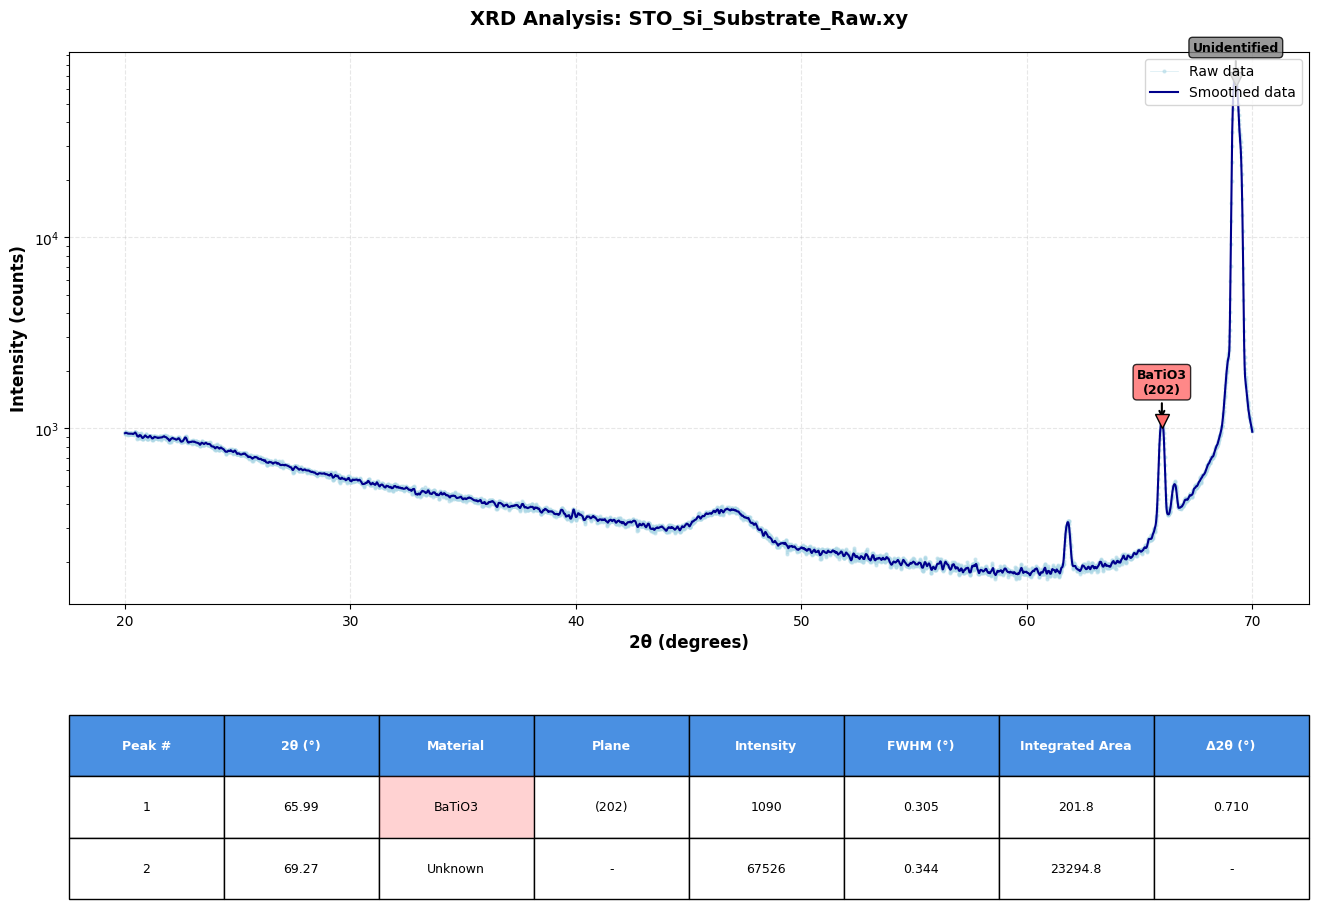


DETAILED PEAK REPORT: STO_Si_Substrate_Raw.xy

Peak #1:
  Position (2θ):     65.990°
  Peak Intensity:    1089.6 counts
  FWHM:              0.3055°
  Integrated Area:   201.75
  Material Identification:
    1. BaTiO3 (202) (Reference: 66.70°, Δ = 0.710°)

Peak #2:
  Position (2θ):     69.270°
  Peak Intensity:    67526.1 counts
  FWHM:              0.3437°
  Integrated Area:   23294.82
  Material Identification: No match found in database


ALL PLOTS GENERATED


In [28]:
# Generate detailed plots for each sample
for filename, result in results.items():
    print(f"\nGenerating plot for {filename}...")
    fig = plot_xrd_with_annotations(result, fig_width=16, fig_height=11)
    plt.show()
    
    # Also print a detailed text report
    print(f"\n{'='*80}")
    print(f"DETAILED PEAK REPORT: {filename}")
    print(f"{'='*80}\n")
    
    for i, peak in enumerate(result['peaks'], 1):
        print(f"Peak #{i}:")
        print(f"  Position (2θ):     {peak['position']:.3f}°")
        print(f"  Peak Intensity:    {peak['intensity']:.1f} counts")
        print(f"  FWHM:              {peak['fwhm']:.4f}°" if np.isfinite(peak['fwhm']) else "  FWHM:              N/A")
        print(f"  Integrated Area:   {peak['area']:.2f}" if np.isfinite(peak['area']) else "  Integrated Area:   N/A")
        
        if peak['matches']:
            print(f"  Material Identification:")
            for j, match in enumerate(peak['matches'][:3], 1):  # Show top 3 matches
                print(f"    {j}. {match['material']} {match['plane']} "
                      f"(Reference: {match['reference']:.2f}°, Δ = {match['deviation']:.3f}°)")
        else:
            print(f"  Material Identification: No match found in database")
        print()

print("\n" + "="*80)
print("ALL PLOTS GENERATED")
print("="*80)

In [29]:
# Function to plot XRD with simple peak detection (like reference image 1)
def plot_xrd_simple_style(analysis_result, filename_display=None):
    """
    Create XRD plot with simple peak detection style matching reference image.
    """
    two_theta = analysis_result['two_theta']
    intensity = analysis_result['intensity']
    intensity_smooth = analysis_result['intensity_smooth']
    peaks = analysis_result['peaks']
    filename = filename_display if filename_display else analysis_result['filename']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot smoothed data
    ax.plot(two_theta, intensity_smooth, '-', color='black', linewidth=1.5, label='smoothed')
    
    # Mark peaks with red X
    peak_positions = [peak['position'] for peak in peaks]
    peak_intensities = [peak['intensity'] for peak in peaks]
    ax.plot(peak_positions, peak_intensities, 'rx', markersize=10, markeredgewidth=2, label='peaks')
    
    # Add vertical bands and labels for each peak
    for peak in peaks:
        pos = peak['position']
        
        # Add shaded vertical region
        ax.axvspan(pos - 1.5, pos + 1.5, alpha=0.1, color='lightblue')
        
        # Add label at top
        if peak['matches']:
            best_match = peak['matches'][0]
            label = best_match['plane']
            ax.text(pos, ax.get_ylim()[1] * 0.95, label, 
                   ha='center', va='top', fontsize=10, fontweight='bold')
    
    ax.set_xlabel('2θ (deg)', fontsize=12)
    ax.set_ylabel('Intensity (a.u.)', fontsize=12)
    ax.set_title(filename, fontsize=12)
    ax.set_xlim(20, 70)
    ax.set_yscale('log')
    ax.legend(loc='upper right', framealpha=0.9)
    ax.grid(False)
    
    plt.tight_layout()
    
    # Print peak information below the plot
    print(f"\n{filename}  peaks: {len(peaks)}")
    for i, peak in enumerate(peaks, 1):
        if peak['matches']:
            best_match = peak['matches'][0]
            plane = best_match['plane']
            rank = f"[R{i}]"
            print(f"  {plane:6s} {rank:6s} {peak['position']:6.2f}°  I={peak['intensity']:7.1f}  "
                  f"FWHM={peak['fwhm']:6.4f}°  Area={peak['area']:7.2f}")
    
    return fig

print("Simple plotting function defined!")

Simple plotting function defined!


In [30]:
XRD_REFERENCES = {
    'BaTiO3': {
        # Tetragonal BaTiO3 at room temperature
        '(100)': 22.1,
        '(110)': 31.5,
        '(111)': 38.7,
        '(200)': 45.1,
        '(102)': 50.7,
        '(112)': 55.9,
        '(202)': 66.7,
    },
    'SrTiO3': {
        # Cubic SrTiO3
        '(100)': 22.76,
        '(110)': 32.39,
        '(111)': 39.96,
        '(200)': 46.46,
        '(210)': 52.32,
        '(211)': 57.78,
        '(220)': 67.78,
        '(300)': 72.46,
        '(310)': 77.21,
    },
}

In [31]:
# Calculate distances from target position and define position coordinates
# Target position: x=399.88, y=224.1, z=322.15 (fixed)
# Position 1: x=279.9, y=245.1, z=435
# Position 2: x=242.5, y=257, z=435
# Position 3: x=204.1, y=264.9, z=435

target = np.array([399.88, 224.1, 322.15])
positions = {
    '1': np.array([279.9, 245.1, 435]),
    '2': np.array([242.5, 257, 435]),
    '3': np.array([204.1, 264.9, 435])
}

# Calculate distances from target
distances = {}
for pos_num, pos_coords in positions.items():
    distance = np.linalg.norm(pos_coords - target)
    distances[pos_num] = distance
    print(f"Position {pos_num}: Distance from target = {distance:.2f} mm")

# Extract peak areas from deposition_results
def extract_peak_areas_by_position(deposition_results, peak_ranges):
    """
    Extract peak areas for specific materials and planes.
    peak_ranges: dict with keys like 'BaTiO3_100' and values as (min_2theta, max_2theta)
    """
    extracted_data = {}
    
    for dep_type in ['9', '10', '11']:
        extracted_data[dep_type] = {}
        
        for position in ['1', '2', '3']:
            filename = f"Deposition_{dep_type}-{position}.xy"
            
            if filename in deposition_results:
                result = deposition_results[filename]
                extracted_data[dep_type][position] = {
                    'distance': distances[position],
                    'peak_areas': {}
                }
                
                # Search for peaks in specified ranges
                for peak_name, (min_theta, max_theta) in peak_ranges.items():
                    for peak in result['peaks']:
                        if min_theta <= peak['position'] <= max_theta:
                            extracted_data[dep_type][position]['peak_areas'][peak_name] = peak['area']
                            break
                    else:
                        # Peak not found in range
                        extracted_data[dep_type][position]['peak_areas'][peak_name] = 0
    
    return extracted_data

# Define peak ranges (2θ ranges to search for each peak)
peak_ranges = {
    'BaTiO3_100': (21.5, 22.5),
    'SrTiO3_100': (22.5, 23.0),
    'BaTiO3_002': (44.0, 45.5),
    'SrTiO3_200': (46.0, 47.0)
}

print("\nPositions and extraction function defined successfully!")

Position 1: Distance from target = 166.05 mm
Position 2: Distance from target = 196.43 mm
Position 3: Distance from target = 229.63 mm

Positions and extraction function defined successfully!


In [32]:
# Function to plot XRD with simple peak detection (like reference image 1)
def plot_xrd_simple_style(analysis_result, filename_display=None):
    """
    Create XRD plot with simple peak detection style matching reference image.
    """
    two_theta = analysis_result['two_theta']
    intensity = analysis_result['intensity']
    intensity_smooth = analysis_result['intensity_smooth']
    peaks = analysis_result['peaks']
    filename = filename_display if filename_display else analysis_result['filename']
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot smoothed data
    ax.plot(two_theta, intensity_smooth, '-', color='black', linewidth=1.5, label='smoothed')
    
    # Mark peaks with red X
    peak_positions = [peak['position'] for peak in peaks]
    peak_intensities = [peak['intensity'] for peak in peaks]
    ax.plot(peak_positions, peak_intensities, 'rx', markersize=10, markeredgewidth=2, label='peaks')
    
    # Add vertical bands and labels for each peak
    for peak in peaks:
        pos = peak['position']
        
        # Add shaded vertical region
        ax.axvspan(pos - 1.5, pos + 1.5, alpha=0.1, color='lightblue')
        
        # Add label at top
        if peak['matches']:
            best_match = peak['matches'][0]
            label = best_match['plane']
            ax.text(pos, ax.get_ylim()[1] * 0.001, label, 
                   ha='center', va='top', fontsize=10, fontweight='bold', rotation=90)
    
    ax.set_xlabel('2θ (deg)', fontsize=12)
    ax.set_ylabel('Intensity (a.u.)', fontsize=12)
    ax.set_title(filename, fontsize=12)
    ax.set_xlim(20, 70)
    ax.set_yscale('log')
    ax.legend(loc='upper right', framealpha=0.9)
    ax.grid(False)
    
    plt.tight_layout()
    
    # Print peak information below the plot
    print(f"\n{filename}  peaks: {len(peaks)}")
    for i, peak in enumerate(peaks, 1):
        if peak['matches']:
            best_match = peak['matches'][0]
            plane = best_match['plane']
            rank = f"[R{i}]"
            print(f"  {plane:6s} {rank:6s} {peak['position']:6.2f}°  I={peak['intensity']:7.1f}  "
                  f"FWHM={peak['fwhm']:6.4f}°  Area={peak['area']:7.2f}")
    
    return fig

print("Simple plotting function defined!")

Simple plotting function defined!


In [34]:
# Analyze all deposition files
deposition_files = [
    "Deposition_9-1.xy",
    "Deposition_9-2.xy",
    "Deposition_9-3.xy",
    "Deposition_10-1.xy",
    "Deposition_10-2.xy",
    "Deposition_10-3.xy",
    "Deposition_11-1.xy",
    "Deposition_11-2.xy",
    "Deposition_11-3.xy",
]

print("="*100)
print("DEPOSITION SAMPLES XRD ANALYSIS")
print("="*100)

deposition_results = {}

for f in deposition_files:
    if os.path.exists(f):
        print(f"\nAnalyzing {f}...")
        
        # Analyze
        result = analyze_xrd_with_peak_identification(f, prominence_ratio=10, height_percentile=2)
        deposition_results[f] = result
        
        print(f"  Found {len(result['peaks'])} peaks")

print("\n" + "="*100)
print("ALL DEPOSITION SAMPLES ANALYZED")
print("="*100)

DEPOSITION SAMPLES XRD ANALYSIS

Analyzing Deposition_9-1.xy...
  Found 6 peaks

Analyzing Deposition_9-2.xy...
  Found 6 peaks

Analyzing Deposition_9-3.xy...
  Found 6 peaks

Analyzing Deposition_10-1.xy...
  Found 6 peaks

Analyzing Deposition_10-2.xy...
  Found 6 peaks

Analyzing Deposition_10-3.xy...
  Found 5 peaks

Analyzing Deposition_11-1.xy...
  Found 5 peaks

Analyzing Deposition_11-2.xy...
  Found 7 peaks

Analyzing Deposition_11-3.xy...
  Found 5 peaks

ALL DEPOSITION SAMPLES ANALYZED


C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\500989426.py:58: PeakPropertyWarning: some peaks have a prominence of 0
  widths, width_heights, left_ips, right_ips = peak_widths(
C:\Users\Kak Zirek\AppData\Local\Temp\ipykernel_41016\500989426.py:58: PeakPropertyWarning: some peaks have a width of 0
  widths, width_heights, left_ips, right_ips = peak_widths(


PLOTTING INDIVIDUAL SAMPLES WITH SIMPLE STYLE


Deposition_9-1.xy  peaks: 6
  (100)  [R1]    21.59°  I=97545.8  FWHM=0.2537°  Area=26097.61
  (100)  [R2]    22.77°  I=25752.9  FWHM=0.2327°  Area=5891.85
  (200)  [R5]    46.51°  I=279124.4  FWHM=0.2604°  Area=75004.97
  (220)  [R6]    68.33°  I= 2751.5  FWHM=0.5032°  Area= 979.46


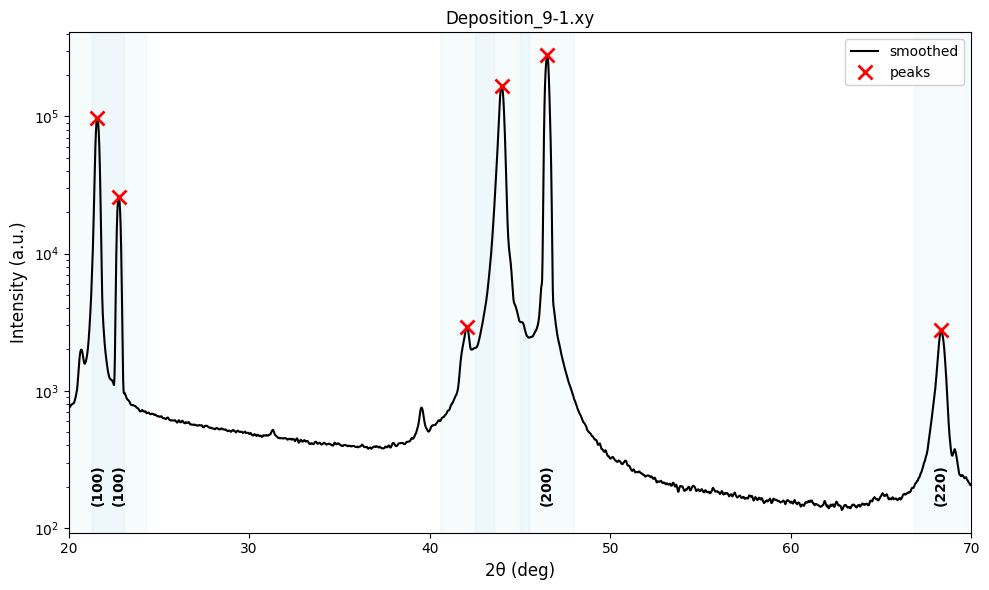



Deposition_9-2.xy  peaks: 6
  (100)  [R1]    21.99°  I=10701.5  FWHM=0.2969°  Area=3143.28
  (100)  [R2]    22.76°  I=34310.9  FWHM=0.2351°  Area=7786.66
  (200)  [R4]    44.85°  I=14834.7  FWHM=0.5980°  Area=5069.35
  (200)  [R5]    46.51°  I=295589.3  FWHM=0.2610°  Area=79074.30
  (112)  [R6]    55.92°  I= 1806.7  FWHM=0.4941°  Area= 657.55


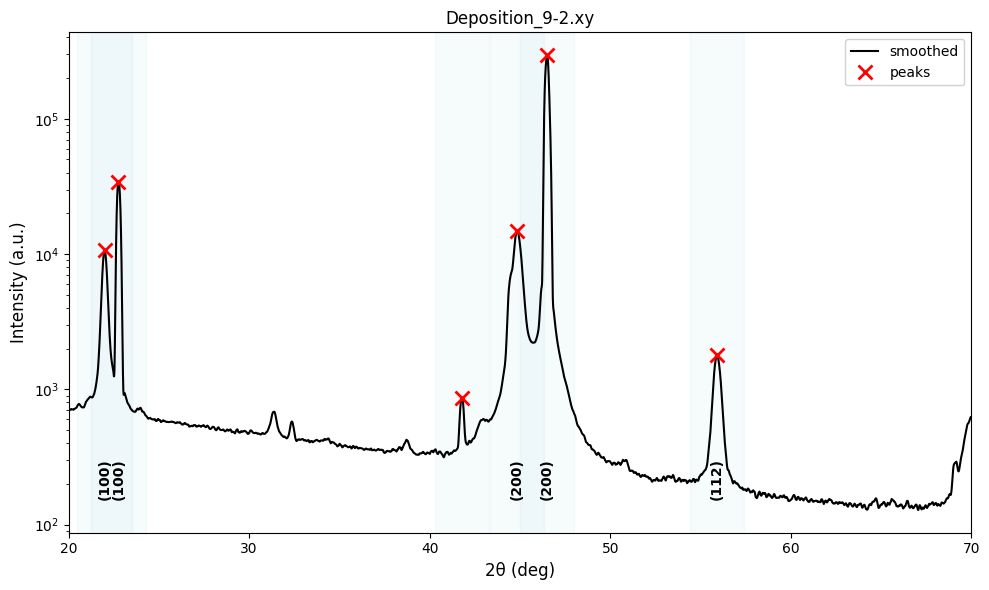



Deposition_9-3.xy  peaks: 6
  (100)  [R1]    21.87°  I= 1488.3  FWHM=1.9838°  Area= 183.30
  (100)  [R2]    22.78°  I=43320.7  FWHM=0.2353°  Area=10066.05
  (110)  [R3]    31.33°  I= 1314.8  FWHM=0.7416°  Area= 313.89
  (200)  [R5]    44.46°  I= 4093.0  FWHM=0.2793°  Area= 866.89
  (200)  [R6]    46.52°  I=330389.9  FWHM=0.2602°  Area=88131.51


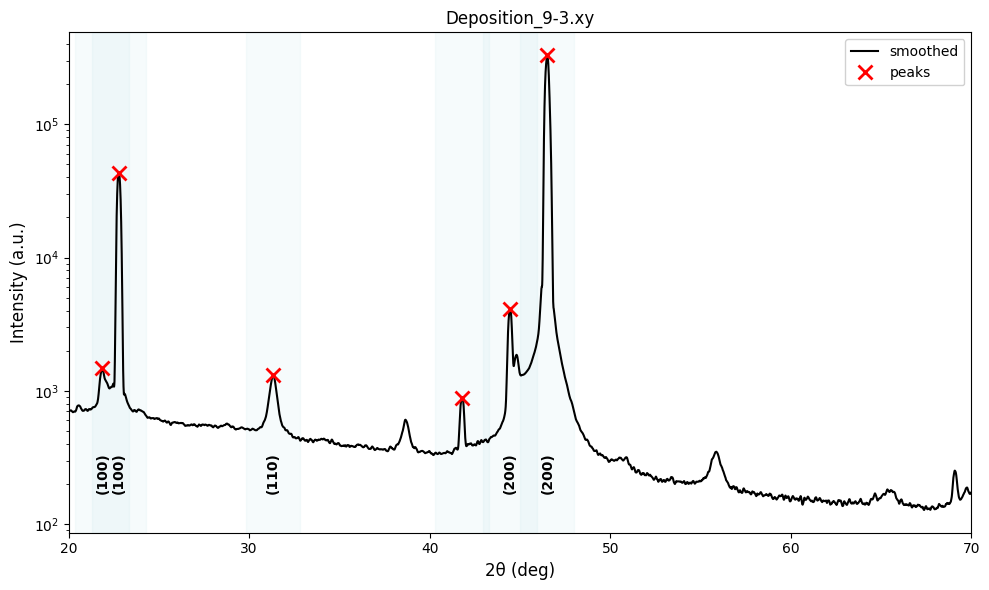



Deposition_10-1.xy  peaks: 6
  (100)  [R1]    21.72°  I=54718.1  FWHM=0.2551°  Area=14515.18
  (100)  [R2]    22.77°  I=38945.0  FWHM=0.2322°  Area=9046.96
  (200)  [R4]    44.29°  I=91782.2  FWHM=0.3197°  Area=28574.67
  (200)  [R5]    46.51°  I=319453.8  FWHM=0.2613°  Area=85208.38


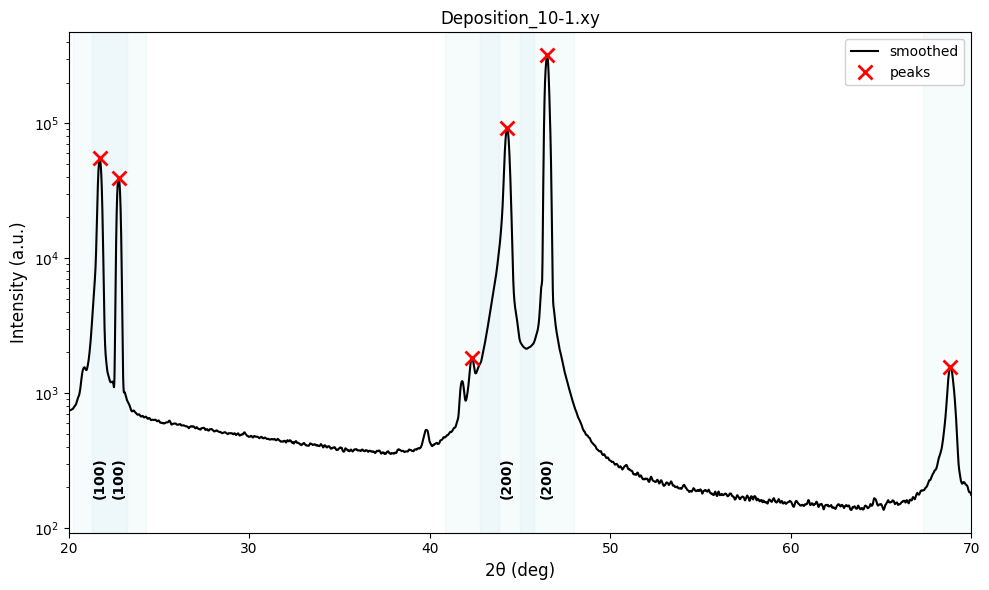



Deposition_10-2.xy  peaks: 6
  (100)  [R1]    21.89°  I=46827.7  FWHM=0.2538°  Area=12150.87
  (100)  [R2]    22.78°  I=46335.8  FWHM=0.2372°  Area=10727.41
  (200)  [R4]    44.61°  I=66408.1  FWHM=0.3363°  Area=22530.18
  (200)  [R5]    46.52°  I=374137.3  FWHM=0.2577°  Area=100580.37


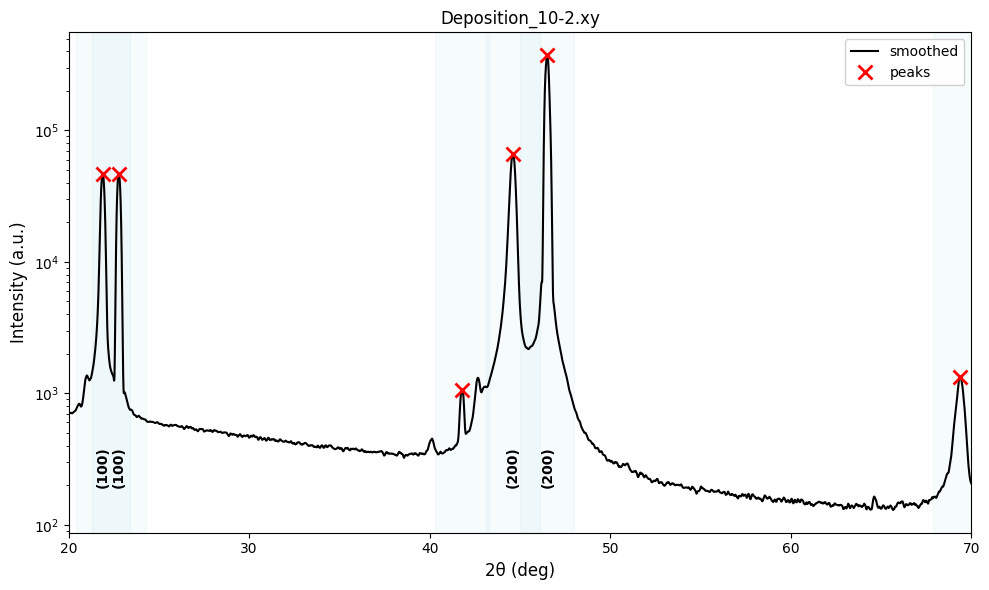



Deposition_10-3.xy  peaks: 5
  (100)  [R1]    21.98°  I=14592.9  FWHM=0.3310°  Area=4713.19
  (100)  [R2]    22.77°  I=52210.4  FWHM=0.2331°  Area=11835.15
  (200)  [R4]    44.82°  I=15931.5  FWHM=0.7569°  Area=5914.29
  (200)  [R5]    46.51°  I=359413.7  FWHM=0.2610°  Area=96007.74


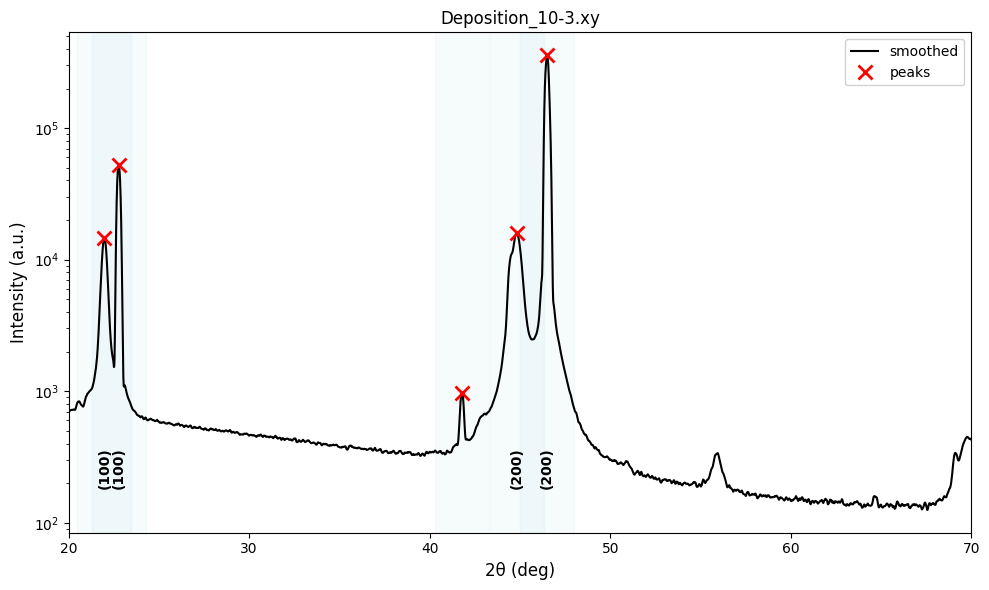



Deposition_11-1.xy  peaks: 5
  (100)  [R1]    21.83°  I=55347.9  FWHM=0.2533°  Area=14131.12
  (100)  [R2]    22.77°  I=40257.1  FWHM=0.2296°  Area=9215.41
  (200)  [R3]    44.51°  I=94674.8  FWHM=0.3221°  Area=30226.31
  (200)  [R4]    46.51°  I=323187.0  FWHM=0.2610°  Area=86267.17


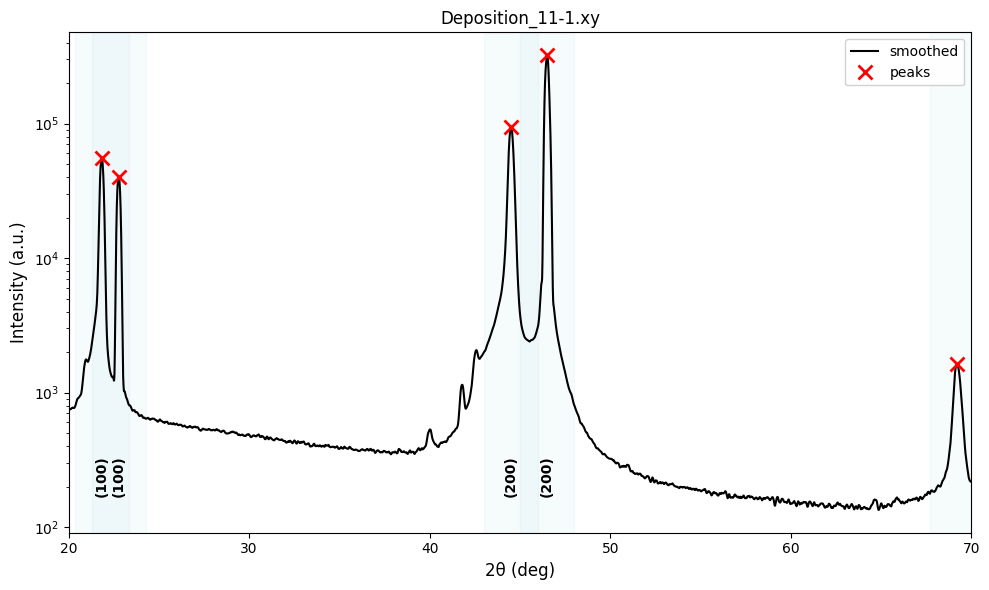



Deposition_11-2.xy  peaks: 7
  (100)  [R1]    21.81°  I=46760.4  FWHM=0.2473°  Area=11827.99
  (100)  [R2]    22.77°  I=46436.4  FWHM=0.2345°  Area=10795.47
  (200)  [R5]    44.48°  I=72012.3  FWHM=0.3087°  Area=22863.67
  (200)  [R6]    46.51°  I=342701.5  FWHM=0.2619°  Area=92058.49


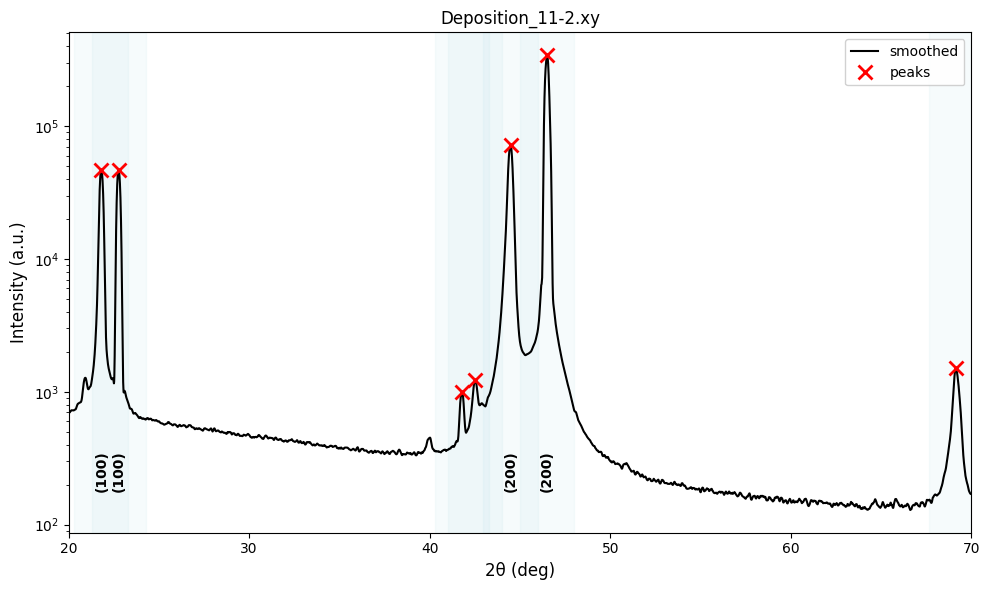



Deposition_11-3.xy  peaks: 5
  (100)  [R1]    21.96°  I=17432.7  FWHM=0.3291°  Area=5715.22
  (100)  [R2]    22.76°  I=50972.2  FWHM=0.2343°  Area=11727.38
  (200)  [R4]    44.82°  I=18532.9  FWHM=0.7363°  Area=6907.15
  (200)  [R5]    46.50°  I=347816.1  FWHM=0.2615°  Area=94452.38


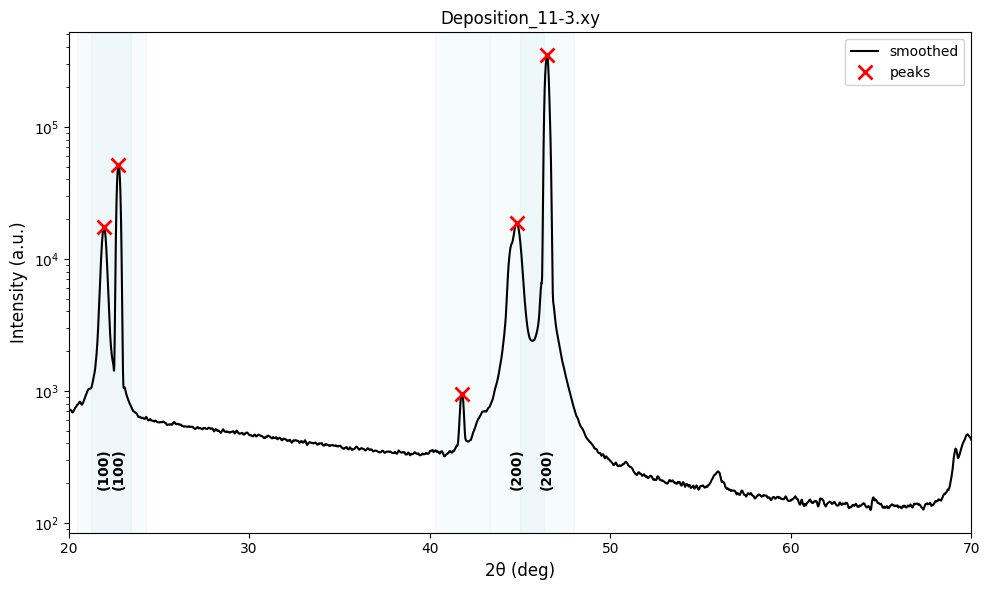


ALL INDIVIDUAL PLOTS GENERATED


In [35]:
# Plot individual deposition samples with simple style (like reference image 1)
print("="*100)
print("PLOTTING INDIVIDUAL SAMPLES WITH SIMPLE STYLE")
print("="*100)

# Plot each deposition file
for filename, result in deposition_results.items():
    print(f"\n{'='*100}")
    fig = plot_xrd_simple_style(result, filename_display=filename)
    plt.show()

print("\n" + "="*100)
print("ALL INDIVIDUAL PLOTS GENERATED")
print("="*100)

CREATING INTEGRATED AREA VS DISTANCE PLOTS WITH INDIVIDUAL FITS


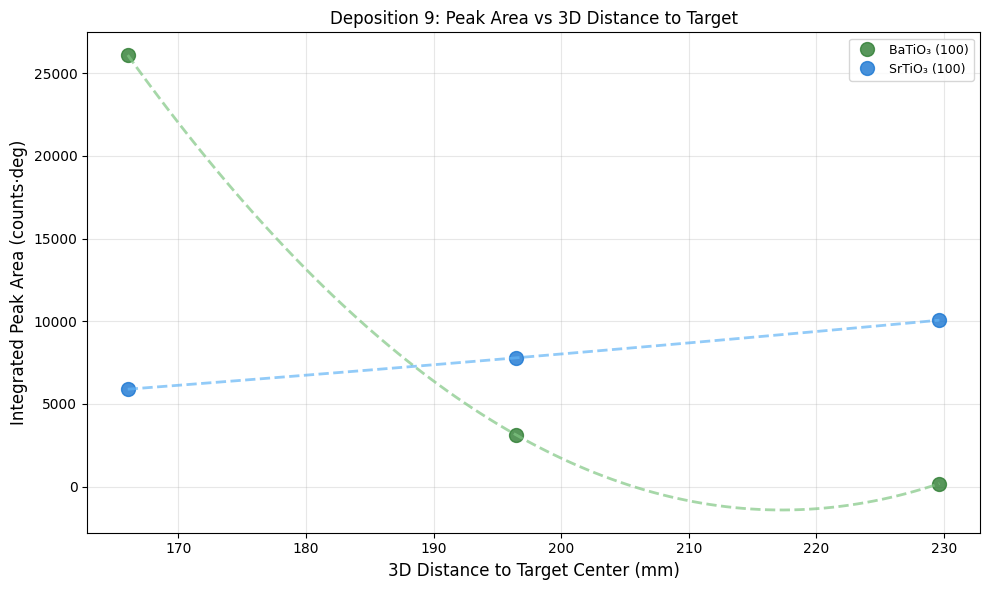


Deposition 9 - Correlation coefficients (Pearson) with 3D distance:

Integrated Area:
  (100): r = -0.903
  (100): r = 1.000



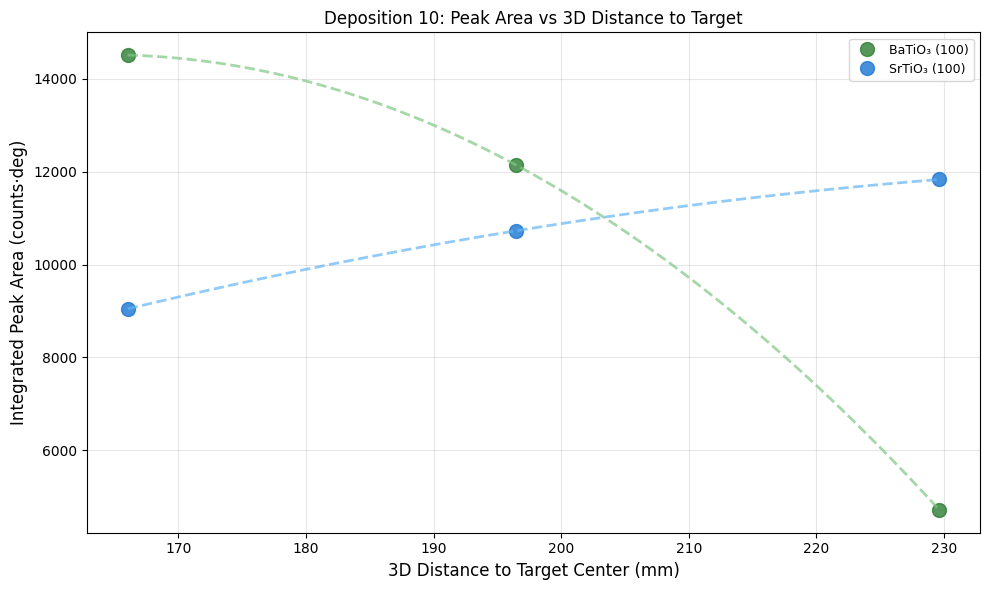


Deposition 10 - Correlation coefficients (Pearson) with 3D distance:

Integrated Area:
  (100): r = -0.965
  (100): r = 0.990



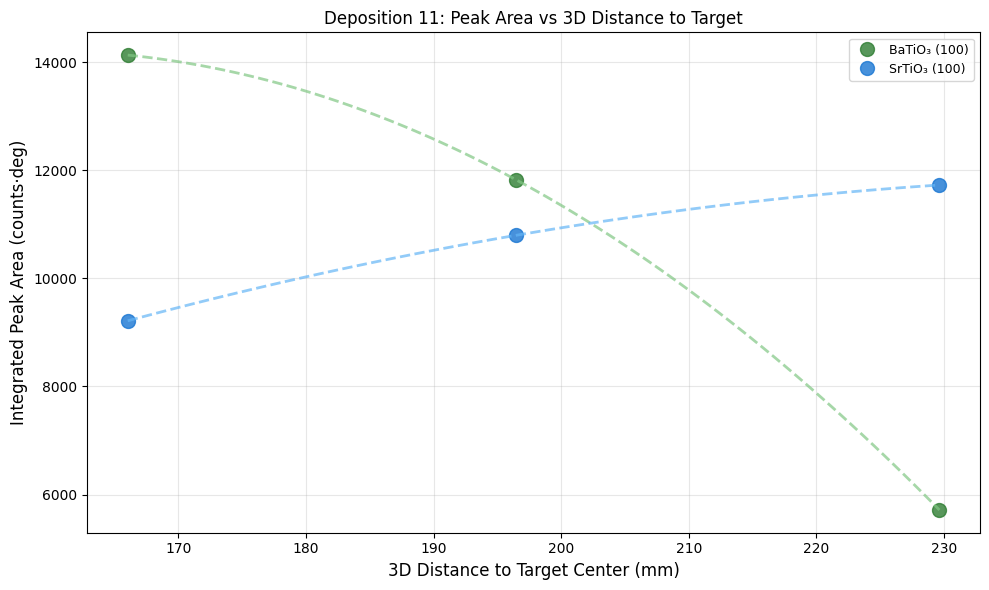


Deposition 11 - Correlation coefficients (Pearson) with 3D distance:

Integrated Area:
  (100): r = -0.974
  (100): r = 0.985


ALL PLOTS GENERATED


In [36]:
# Create distance plots with individual polynomial fits for each peak type
from scipy.stats import pearsonr

print("="*100)
print("CREATING INTEGRATED AREA VS DISTANCE PLOTS WITH INDIVIDUAL FITS")
print("="*100)

# Re-extract the peak data using the updated deposition_results
peak_data = extract_peak_areas_by_position(deposition_results, peak_ranges)

# Define peak styles with different colors
peak_styles = {
    'BaTiO3_100': {'color': '#2E7D32', 'label': 'BaTiO₃ (100)', 'fit_color': '#81C784'},
    'SrTiO3_100': {'color': '#1976D2', 'label': 'SrTiO₃ (100)', 'fit_color': '#64B5F6'}
}

# Create one figure for each deposition type
for dep_type in ['9', '10', '11']:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Store all correlation coefficients
    correlations = {}
    
    # Plot each peak type separately with its own fit
    for peak_name, style in peak_styles.items():
        dist_list = []
        area_list = []
        
        for position in ['1', '2', '3']:
            if position in peak_data[dep_type] and peak_data[dep_type][position]['peak_areas'][peak_name] > 0:
                dist_list.append(peak_data[dep_type][position]['distance'])
                area_list.append(peak_data[dep_type][position]['peak_areas'][peak_name])
        
        if len(dist_list) >= 2:
            # Plot scatter points only (no connecting lines)
            ax.plot(dist_list, area_list, 'o', color=style['color'], 
                   markersize=10, alpha=0.8, label=style['label'])
            
            # Calculate correlation coefficient
            r_value, _ = pearsonr(dist_list, area_list)
            correlations[peak_name] = r_value
            
            # Fit quadratic polynomial for this specific peak
            if len(dist_list) >= 2:
                # Use linear fit for 2 points, quadratic for 3+
                degree = min(2, len(dist_list) - 1)
                coeffs = np.polyfit(dist_list, area_list, degree)
                poly = np.poly1d(coeffs)
                
                # Create smooth curve for plotting
                x_fit = np.linspace(min(dist_list), max(dist_list), 100)
                y_fit = poly(x_fit)
                
                # Plot the fit
                ax.plot(x_fit, y_fit, '--', color=style['fit_color'], 
                       linewidth=2, alpha=0.7)
    
    ax.set_xlabel('3D Distance to Target Center (mm)', fontsize=12)
    ax.set_ylabel('Integrated Peak Area (counts·deg)', fontsize=12)
    ax.set_title(f'Deposition {dep_type}: Peak Area vs 3D Distance to Target', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print correlation coefficients
    print(f"\nDeposition {dep_type} - Correlation coefficients (Pearson) with 3D distance:")
    print("\nIntegrated Area:")
    for peak_name, r in correlations.items():
        material = peak_name.split('_')[0]
        plane = peak_name.split('_')[1]
        print(f"  ({plane}): r = {r:.3f}")
    
    print("\n" + "="*80)

print("\n" + "="*100)
print("ALL PLOTS GENERATED")
print("="*100)